Practice Lasso regularization technique in four steps on the given data set:

1) Use the KFold function from sklearn to divide the data into 5 training/test sets.

2) Tune the lambda parameter in the lasso model by looping over a grid of possible lambdas (sklearn: lasso)

For each candidate lambda, loop over the 5 training/test sets.  
On each training/test set run the lasso model on the training set and then compute and record the prediction error in the test set.  
Finally total the prediction error for the 5 training/test sets.
3) Set lambda to be the value that minimizes prediction error.

4) Run the lasso model again with the optimal lambda determined in step 3. Which variables would you consider excluding on the basis of these results?

In [3]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
#from seaborn import plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Lasso_practice_data.csv')

In [5]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,0.014485,0.461197,-0.194500,0.488717,-2.090401,0.940031,2.016748,-1.273340,1.764350,-0.899677,...,-1.267250,-2.134041,1.015223,-0.051486,-0.986937,0.769463,-0.118029,-0.305543,-0.835995,-0.928682
1,0.511853,1.780529,-1.577474,-1.974116,-0.517988,0.737993,-0.368043,0.427401,0.601782,1.937597,...,-0.351190,0.009177,0.274529,-0.586530,-0.273991,2.087001,-0.411038,-1.759816,0.271427,-0.800622
2,0.004413,0.747184,0.194354,-1.153263,-0.451070,-1.535572,0.059043,0.665234,0.846902,0.181277,...,0.479682,0.128315,-1.672293,-0.721750,0.582573,2.382982,-1.393823,-0.693469,-1.896798,0.935358
3,0.534144,-0.412924,1.318229,1.545906,-0.354998,-1.684463,0.488385,-0.204598,-0.451744,0.359739,...,1.116924,1.081377,2.725351,0.174632,1.111195,0.097257,-1.084416,0.789806,-0.034149,-6.441607
4,0.150066,0.248695,0.144276,-0.774013,-0.918030,-0.134414,-0.176218,0.211906,1.576961,-0.286534,...,-0.755798,-0.947922,1.544411,-1.238756,0.194689,1.660824,-0.443358,0.047590,1.199521,-4.805004


In [7]:
# As we saw before, here is our baseline r^2 score
lr=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.928977714238396

In [8]:
type(y_train)

pandas.core.series.Series

In [9]:
# now
# Is there an easier way to do train/test/validation and Ridge Regression altogether?  Of course there is!

alphspace = np.linspace(-100,5000,100)
#rcv = RidgeCV(cv=10,alphas=alphspace, store_cv_values=True)

for a in alphspace:
    #if you change the store_cv_values to True, and cv=None, it shows
    #cv_values_ (its own cross validation values???!?!?!), which 
    #may be the issue...brain melting...
    rcv = RidgeCV(cv=4,alphas=[a], store_cv_values=False)
    rcv.fit(X_train, y_train)
    sc = rcv.score(X_test, y_test)
    #cv = rcv.cv_values_
    print(f'{a} => {sc}')

rcv = RidgeCV(cv=10,alphas=alphspace)
rcv.fit(X_train, y_train)
sc = rcv.score(X_test, y_test) 
print(f'chosen alpha {rcv.alpha_}')

-100.0 => 0.9228572332654355
-48.484848484848484 => 0.9276053958864197
3.030303030303031 => 0.9289784318709495
54.54545454545456 => 0.9276797934119564
106.06060606060606 => 0.9242646870458194
157.57575757575756 => 0.9191742357854416
209.09090909090912 => 0.9127609783993008
260.6060606060606 => 0.9053081068080436
312.1212121212121 => 0.8970441218145643
363.6363636363636 => 0.8881540989405874
415.1515151515151 => 0.878788420237199
466.66666666666663 => 0.8690695937833496
518.1818181818182 => 0.859097617305909
569.6969696969697 => 0.8489542243267902
621.2121212121212 => 0.8387062660429515
672.7272727272727 => 0.8284084200208073
724.2424242424242 => 0.8181053710601267
775.7575757575758 => 0.8078335756281186
827.2727272727273 => 0.7976226958424509
878.7878787878788 => 0.7874967698000638
930.3030303030303 => 0.7774751704690823
981.8181818181818 => 0.7675733942031033
1033.3333333333333 => 0.7578037113419863
1084.8484848484848 => 0.7481757047015273
1136.3636363636365 => 0.7386967165610036
1187

In [10]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,0.014485,0.461197,-0.194500,0.488717,-2.090401,0.940031,2.016748,-1.273340,1.764350,-0.899677,...,-1.267250,-2.134041,1.015223,-0.051486,-0.986937,0.769463,-0.118029,-0.305543,-0.835995,-0.928682
1,0.511853,1.780529,-1.577474,-1.974116,-0.517988,0.737993,-0.368043,0.427401,0.601782,1.937597,...,-0.351190,0.009177,0.274529,-0.586530,-0.273991,2.087001,-0.411038,-1.759816,0.271427,-0.800622
2,0.004413,0.747184,0.194354,-1.153263,-0.451070,-1.535572,0.059043,0.665234,0.846902,0.181277,...,0.479682,0.128315,-1.672293,-0.721750,0.582573,2.382982,-1.393823,-0.693469,-1.896798,0.935358
3,0.534144,-0.412924,1.318229,1.545906,-0.354998,-1.684463,0.488385,-0.204598,-0.451744,0.359739,...,1.116924,1.081377,2.725351,0.174632,1.111195,0.097257,-1.084416,0.789806,-0.034149,-6.441607
4,0.150066,0.248695,0.144276,-0.774013,-0.918030,-0.134414,-0.176218,0.211906,1.576961,-0.286534,...,-0.755798,-0.947922,1.544411,-1.238756,0.194689,1.660824,-0.443358,0.047590,1.199521,-4.805004


In [11]:
#####################
####  LASSO  ########
#####################

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)

# now
# Is there an easier way to do train/test/validation and Ridge Regression altogether?  Of course there is!

alphspace = np.linspace(0,5000,100)
#rcv = RidgeCV(cv=10,alphas=alphspace, store_cv_values=True)

#for a in alphspace:
lcv = LassoCV(cv=5,alphas=alphspace)
lcv.fit(X_train, y_train)
sc = lcv.score(X_test, y_test)
print(f'{lcv.alpha_} => {sc}')


0.0 => 0.9218473639750295


/Users/loaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/loaner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/loaner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/loaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/loaner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477

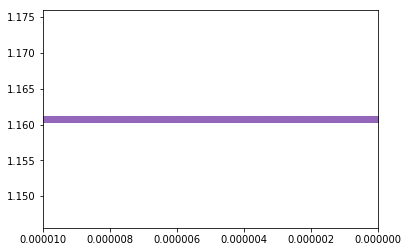

/Users/loaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/loaner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/loaner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[('x6', 1.8673679609887857),
 ('x16', 1.0194837512983888),
 ('x10', 0.17128214371472256),
 ('x3', -0.139270767566622),
 ('x9', -0.21814320001686738),
 ('x20', -0.37112882723379725),
 ('x2', -1.821279729687301),
 ('x14', -2.2255043058268584)]

In [90]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
#from seaborn import plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold

%matplotlib inline

data = pd.read_csv('Lasso_practice_data.csv')
y_trans = data.y
X_trans = data.drop(['y'], 1)

kf = KFold(n=len(data), n_folds=5, shuffle=True)

all_scores=[]
#alphas=[ 1e-4,0.3e-2,0.7e-2, 1e-2,1.1e-1,1.3e-2, 1e-1,1]
alphas = np.linspace(1e-5,0,120)

for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    al = []
    for a in alphas:
        est=Lasso(alpha=a)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        al.append(a)
    all_scores.append(mse_score)
#for e in all_scores :
#    print(e)

for list in all_scores:
    plt.scatter(al, mse_score)
    plt.xlim(alphas[0], alphas[-1])
    #plt.ylim(min(all_scores), max(all_scores))
plt.show()

alpha = 1e-2

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)

est=Lasso(alpha=a)
est.fit(X_train,y_train)
zipped = zip(X_trans.columns, est.coef_)
features = sorted(zipped, key=lambda t:t[1], reverse=True)
[x for x in features if abs(x[1]) > 0.1]
